In [1]:
from piecewise_fun import PieceFunction as pf
import numpy as np

f1 = pf(0,1, (False, True), "3*x")
f2 = pf(1,3, (False, False), "10")
f3 = pf(3,6, (False, True), "3-2*x")

3
f(x)=3*x, x in (0,1]


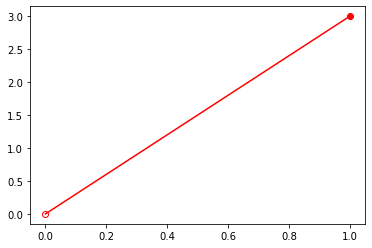

3
0


In [2]:
print(f1.eval(1))
f1.report_f()
print(f1.get_max())
print(f1.get_min())

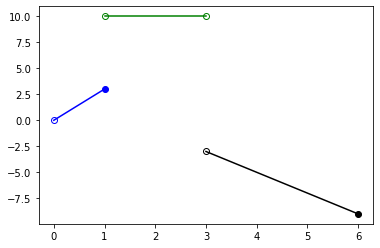

f(4) = -5
[
f(x)=3*x, x in (0,1]
f(x)=10, x in (1,3)
f(x)=3-2*x, x in (3,6]
]
The max value is: 10 from <f(x)=10, x in (1,3)> PieceFunction
(10, 1)
The min value is: -9 from <f(x)=3-2*x, x in (3,6]> PieceFunction
(-9, 2)


In [3]:
from piecewise_fun import PiecewiseFunction as pwf

f_list = pwf([f1, f2, f3])

f_list.plot()
print("f(4) = "+str(f_list.eval(4)))
print(f_list)
print(f_list.get_max(True))
print(f_list.get_min(True))

[
f(x)=3*x, x in (0,1]
f(x)=10, x in (1,3)
f(x)=3-2*x, x in (3,6]
f(x)=3*x, x in (6,10]
]


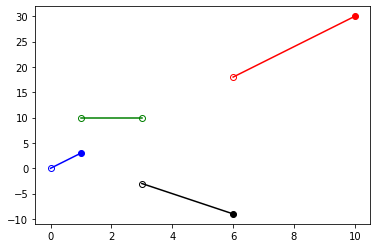

In [8]:
f4 = pf(6, 10, (False, True), "3*x")

# Add the newly created function
f_list.add_fun(f4)
# The new Piecewise function
f_list.report_f()

The number of functions inside Piecewise is: 4
[
f(x)=3*x, x in (0,1]
f(x)=10, x in (1,3)
f(x)=3-2*x, x in (3,6]
]


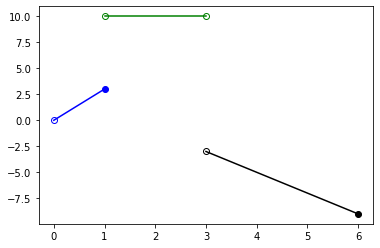

In [9]:
print("The number of functions inside Piecewise is: "+str(len(f_list)))

# Remove the last function
f_list.remove_fun(3)

# The new Piecewise function
f_list.report_f()

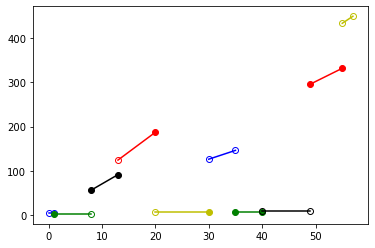

[
f(x)=4, x in (0,1)
f(x)=2, x in [1,8)
f(x)=7*x+0, x in [8,13]
f(x)=9*x+7, x in (13,20]
f(x)=7, x in (20,30]
f(x)=4*x+6, x in (30,35)
f(x)=6, x in [35,40]
f(x)=9, x in (40,49)
f(x)=6*x+2, x in [49,55]
f(x)=8*x+-6, x in (55,57)
]


In [6]:
from rand_pwf import random_piecewise_funct

# Create a PiecewiseFunction which contains 10 randomly created constant/linear functions
fun_list=random_piecewise_funct( int, 10)

fun_list.plot()
print(fun_list)


In [7]:
import time
from matplotlib import pyplot as plt

construction_times=[]
evaluation_times=[]
function_num=list(range(100000,1000000,10000))
for i in function_num:
    start = time.time()
    random_piecewise_funct(int, i)
    end = time.time()
    construction_times.append(end-start)
plt.plot(function_num, construction_times, color="blue")

KeyboardInterrupt: 